**Análisis estadístico de los tipos de entidades financieras en Colombia, durante los últimos años.**

Presentado por:Geraldyne Rozo Arias


I. Alcance del proyecto y captura de datos


Para el proyecto a desarrollar, se utilizará un conjunto de datos obtenidos del portal Datos Abiertos (https://www.datos.gov.co). Este contiene "La rentabilidad de los Fondos de Inversión Colectiva (en adelante FIC) y Fondos de Capital Privado (en adelante FCP) está determinada por la variación del valor de unidad diaria de las unidades de inversión llamadas "Participaciones".(Datos Abiertos, 2023).
Cuenta con un total de resgistros de 1,78M y 26 columnas respectivamente, y la fuente que suministra dicha información es la Superintendencia Financiera de Colombia.

La preparacion de estos datos, pretende generar un conocimiento a fondo respecto al area financiera especificamente para las personas interesadas en el analisis de los tipos de entidades (Sociedades de inversion, Fiduciar. etc) durante los ultimos años en Colombia.

 II. Explorar y evaluar los datos, el EDA

Librerias utilizadas en el análisis

Para iniciar se encontrarán las diferentes librerias de python, asi mismo durante el proceso de análisis se fueron incluyendo respectivamente.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Se procede a cargar la base de datos a trabajar, en este caso, rentabilidades de los Fondos de Inversion Colectiva

In [ ]:
Base=pd.read_csv("/content/Rentabilidades_de_los_Fondos_de_Inversi_n_Colectiva__FIC_.csv")
Base.head(5)

,FECHA_CORTE,TIPO_ENTIDAD,NOMBRE_TIPO_ENTIDAD,CODIGO_ENTIDAD,NOMBRE_ENTIDAD,TIPO_NEGOCIO,NOMBRE_TIPO_PATRIMONIO,SUBTIPO_NEGOCIO,NOMBRE_SUBTIPO_PATRIMONIO,CODIGO_NEGOCIO,...,VALOR_UNIDAD_OPERACIONES_DIA_T,APORTES_RECIBIDOS,RETIROS_REDENCIONES,ANULACIONES,VALOR_FONDO_CIERRE_DIA_T,NUMERO_INVERSIONISTAS,RENTABILIDAD_DIARIA,RENTABILIDAD_MENSUAL,RENTABILIDAD_SEMESTRAL,RENTABILIDAD_ANUAL
0,20/07/2020,87,SOCIEDADES ADMINISTRADORAS DE INVERSIÓN,11,Progresion Sociedad Administradora De Inversio...,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,63109,...,11813.677865,0.000000e+00,0.000000e+00,0.0,6.832705e+09,174.0,1.661225,3.968064,4.398817,3.585329
1,09/12/2022,5,SF-SOCIEDAD FIDUCIARIA,7,Skandia Fiduciaria S.A.,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,97207,...,9521.425613,0.000000e+00,0.000000e+00,0.0,1.189565e+09,1.0,-61.082414,6.700275,4.908149,-3.436502
2,25/05/2019,5,SF-SOCIEDAD FIDUCIARIA,20,Fiduciaria Corficolombiana S.A.,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,53954,...,36173.978276,0.000000e+00,0.000000e+00,0.0,5.418895e+10,146.0,2.910242,3.105858,2.815312,2.725735
3,20/01/2022,5,SF-SOCIEDAD FIDUCIARIA,7,Skandia Fiduciaria S.A.,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,51953,...,2887.184582,1.432000e+09,2.800106e+09,0.0,7.698780e+10,20.0,6.195891,4.908144,1.788026,1.356296
4,11/07/2023,5,SF-SOCIEDAD FIDUCIARIA,21,Fiduciaria De Occidente S.A. - Fiduoccidente ...,9,FONDOS DE INVERSIÓN COLECTIVA,7,FONDOS DE CAPITAL PRIVADO,110489,...,10045.348515,0.000000e+00,0.000000e+00,0.0,1.493850e+11,2.0,15.482815,0.000000,0.000000,0.000000


A traves de la funcion .info() se pretende conocer el tipo de datos que contiene cada columna.

In [ ]:
Base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14549 entries, 0 to 14548
Data columns (total 26 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   FECHA_CORTE                                       14549 non-null  object 
 1   TIPO_ENTIDAD                                      14549 non-null  int64  
 2   NOMBRE_TIPO_ENTIDAD                               14549 non-null  object 
 3   CODIGO_ENTIDAD                                    14549 non-null  int64  
 4   NOMBRE_ENTIDAD                                    14549 non-null  object 
 5   TIPO_NEGOCIO                                      14549 non-null  int64  
 6   NOMBRE_TIPO_PATRIMONIO                            14549 non-null  object 
 7   SUBTIPO_NEGOCIO                                   14549 non-null  int64  
 8   NOMBRE_SUBTIPO_PATRIMONIO                         14549 non-null  object 
 9   CODIGO_NEGOCIO   

Luego de esto, se procede a verificar los campos vacios o nulos de cada columna

In [ ]:
caracteres_especiales = ['?', '!', '@', '*']

In [ ]:
columnas_caracteres_especiales = Base.columns[Base.astype(str).apply(lambda x: any(char in str(x) for char in caracteres_especiales))]
columnas_campos_vacios = Base.columns[Base.isnull().any()]

In [ ]:
print(columnas_caracteres_especiales)

Index([], dtype='object')


In [ ]:
print(columnas_campos_vacios)

Index(['NUMERO_UNIDADES_FONDO_CIERRE_OPER_DIA_T_ANTERIOR',
       'VALOR_UNIDAD_OPERACIONES_DIA_T', 'APORTES_RECIBIDOS',
       'RETIROS_REDENCIONES', 'ANULACIONES', 'VALOR_FONDO_CIERRE_DIA_T',
       'NUMERO_INVERSIONISTAS', 'RENTABILIDAD_DIARIA', 'RENTABILIDAD_MENSUAL',
       'RENTABILIDAD_SEMESTRAL', 'RENTABILIDAD_ANUAL'],
      dtype='object')


Para verificar que ninguna de las columnas efectivamente no registra un ratio mayor al 15% de datos vacios, se procede a:

In [ ]:
na_ratio = ((Base.isnull().sum() / len(Base))*100).sort_values(ascending = False)
print(na_ratio)

RENTABILIDAD_ANUAL                                  0.006873
RENTABILIDAD_SEMESTRAL                              0.006873
RENTABILIDAD_MENSUAL                                0.006873
RENTABILIDAD_DIARIA                                 0.006873
NUMERO_INVERSIONISTAS                               0.006873
VALOR_FONDO_CIERRE_DIA_T                            0.006873
ANULACIONES                                         0.006873
RETIROS_REDENCIONES                                 0.006873
APORTES_RECIBIDOS                                   0.006873
VALOR_UNIDAD_OPERACIONES_DIA_T                      0.006873
NUMERO_UNIDADES_FONDO_CIERRE_OPER_DIA_T_ANTERIOR    0.006873
TIPO_ENTIDAD                                        0.000000
PRECIERRE_FONDO_DIA_T                               0.000000
FECHA_CORTE                                         0.000000
TIPO_PARTICIPACION                                  0.000000
PRINCIPAL_COMPARTIMENTO                             0.000000
NOMBRE_PATRIMONIO       

Seguido a esto, se pretende reducir el conjunto de datos eliminando las columnas que no aportan informacion. En este caso, la columna adiciones no presenta datos distintos a cero, lo cual no brinda valor al conjunto de datos.

In [ ]:
columnas_eliminar = ['ANULACIONES']
Base_1 = Base.drop(columnas_eliminar, axis= 1)

In [ ]:
Base_1.shape

(14549, 25)

Con fines de segmentación se pretende modificar la columna "Fecha_corte" siendo asi mas práctico para futuros análisis y graficas, sin alterar el contenido de las demas columnas.

In [ ]:
# Convertir la columna "FECHA_CORTE" al formato de fecha
Base_1['FECHA_CORTE'] = pd.to_datetime(Base_1['FECHA_CORTE'])
Base_1['FECHA_CORTE'] = Base_1['FECHA_CORTE'].dt.year

# Imprimir el DataFrame resultante con la columna "FECHA_CORTE" en formato de fecha
print(Base_1)

       FECHA_CORTE  TIPO_ENTIDAD                      NOMBRE_TIPO_ENTIDAD  \
0             2020            87  SOCIEDADES ADMINISTRADORAS DE INVERSIÓN   
1             2022             5                   SF-SOCIEDAD FIDUCIARIA   
2             2019             5                   SF-SOCIEDAD FIDUCIARIA   
3             2022             5                   SF-SOCIEDAD FIDUCIARIA   
4             2023             5                   SF-SOCIEDAD FIDUCIARIA   
...            ...           ...                                      ...   
14544         2022             5                   SF-SOCIEDAD FIDUCIARIA   
14545         2021             5                   SF-SOCIEDAD FIDUCIARIA   
14546         2023             5                   SF-SOCIEDAD FIDUCIARIA   
14547         2022             5                   SF-SOCIEDAD FIDUCIARIA   
14548         2021            85        COMISIONISTAS DE BOLSA DE VALORES   

       CODIGO_ENTIDAD                                     NOMBRE_ENTIDAD  \

<ipython-input-14-6ab6fa48dfe5>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Base_1['FECHA_CORTE'] = pd.to_datetime(Base_1['FECHA_CORTE'])


Una vez tenemos el conjunto de datos ajustado, procedemos a realizar el analisis de esta por medio de las siguientes preguntas:

a.¿Cuántos negocios por nombre subtipo patrimonio se generaron durante cada año, para cada una de las entidades?

In [ ]:
Negocio_Subtipo = Base_1.groupby(["NOMBRE_SUBTIPO_PATRIMONIO", "FECHA_CORTE", "NOMBRE_ENTIDAD"]).size().reset_index(name='CANTIDAD_NEGOCIO')
Negocio_Subtipo


,NOMBRE_SUBTIPO_PATRIMONIO,FECHA_CORTE,NOMBRE_ENTIDAD,CANTIDAD_NEGOCIO
0,FIC BURSATILES,2019,Citivalores,4
1,FIC BURSATILES,2019,Fiduciaria Bogotá S.A.,3
2,FIC BURSATILES,2020,Citivalores,5
3,FIC BURSATILES,2020,Fiduciaria Bogotá S.A.,3
4,FIC BURSATILES,2021,Citivalores,3
...,...,...,...,...
355,FONDOS DE CAPITAL PRIVADO,2023,Servitrust Gnb Sudameris S.A.,3
356,FONDOS DE CAPITAL PRIVADO,2023,Servivalores Gnb Sudameris S.A. Comisionista D...,3
357,FONDOS DE CAPITAL PRIVADO,2023,Skandia Fiduciaria S.A.,3
358,FONDOS DE CAPITAL PRIVADO,2023,Sociedad Fiduciaria De Desarrollo Agropecuario...,1


b. A través de un histograma, de a conocer la cantidad de negocios que se produjeron para el año 2020 en cada subtipo de patrimonio

In [ ]:
FCP = Base_1.groupby(["NOMBRE_SUBTIPO_PATRIMONIO", "FECHA_CORTE"]).size().reset_index(name='CANTIDAD_NEGOCIO')
FCP
FCP= FCP[(FCP["FECHA_CORTE"] == 2020)]
FCP

,NOMBRE_SUBTIPO_PATRIMONIO,FECHA_CORTE,CANTIDAD_NEGOCIO
1,FIC BURSATILES,2020,8
6,FIC DE MERCADO MONETARIO,2020,41
11,FIC DE TIPO GENERAL,2020,1885
16,FIC INMOBILIARIAS,2020,91
21,FONDOS DE CAPITAL PRIVADO,2020,848


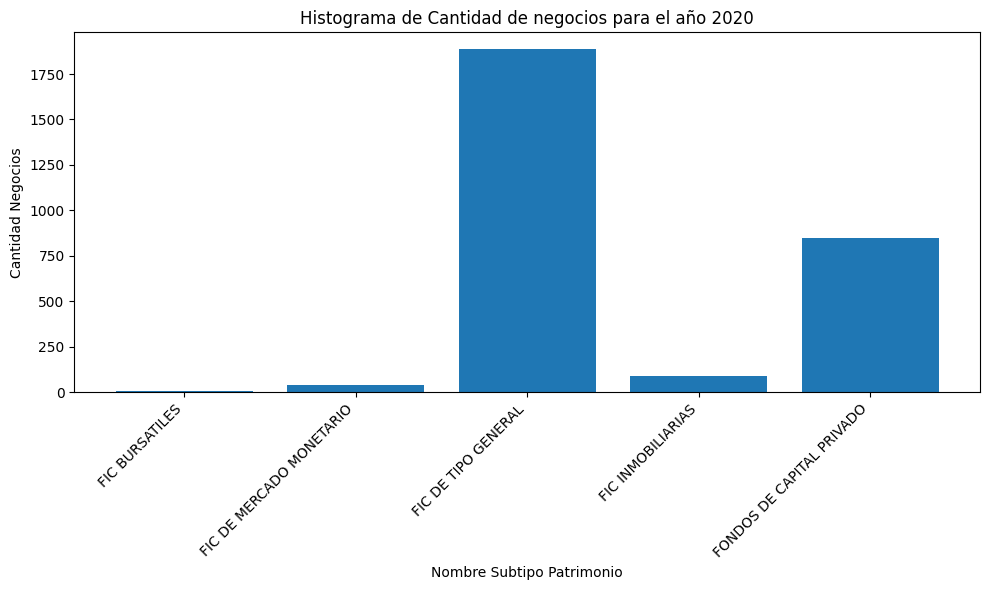

In [ ]:
# Filtrar los datos para el año 2020
FCP_2020 = FCP[FCP["FECHA_CORTE"] == 2020]


# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(FCP_2020["NOMBRE_SUBTIPO_PATRIMONIO"], FCP_2020["CANTIDAD_NEGOCIO"])
plt.xlabel('Nombre Subtipo Patrimonio')
plt.ylabel('Cantidad Negocios')
plt.title('Histograma de Cantidad de negocios para el año 2020')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


c. ¿Cuántos negocios de FIC de mercado monetario se presentaron en el año 2019?

In [ ]:
FCP = Base_1.groupby(["NOMBRE_SUBTIPO_PATRIMONIO", "FECHA_CORTE"]).size().reset_index(name='CANTIDAD_NEGOCIO')
FCP
FCP= FCP[(FCP["FECHA_CORTE"] == 2019)]
FCP
FCP= FCP[(FCP["NOMBRE_SUBTIPO_PATRIMONIO"] == 'FIC DE MERCADO MONETARIO')]
FCP

,NOMBRE_SUBTIPO_PATRIMONIO,FECHA_CORTE,CANTIDAD_NEGOCIO
5,FIC DE MERCADO MONETARIO,2019,31


d. ¿Cuántas Sociedades Fiduciarias existen en Colombia?

In [ ]:
Entidades=Base_1[['NOMBRE_TIPO_ENTIDAD', 'NOMBRE_ENTIDAD','TIPO_ENTIDAD']]
Entidades.head()
Entidades= Entidades[(Entidades["NOMBRE_TIPO_ENTIDAD"] == "SF-SOCIEDAD FIDUCIARIA")]
Entidades

,NOMBRE_TIPO_ENTIDAD,NOMBRE_ENTIDAD,TIPO_ENTIDAD
1,SF-SOCIEDAD FIDUCIARIA,Skandia Fiduciaria S.A.,5
2,SF-SOCIEDAD FIDUCIARIA,Fiduciaria Corficolombiana S.A.,5
3,SF-SOCIEDAD FIDUCIARIA,Skandia Fiduciaria S.A.,5
4,SF-SOCIEDAD FIDUCIARIA,Fiduciaria De Occidente S.A. - Fiduoccidente ...,5
6,SF-SOCIEDAD FIDUCIARIA,Fiduciaria De Occidente S.A. - Fiduoccidente ...,5
...,...,...,...
14543,SF-SOCIEDAD FIDUCIARIA,Fiduciaria De Occidente S.A. - Fiduoccidente ...,5
14544,SF-SOCIEDAD FIDUCIARIA,Fiduciaria Bogotá S.A.,5
14545,SF-SOCIEDAD FIDUCIARIA,Fiduciaria Colombiana De Comercio Exterior S.A...,5
14546,SF-SOCIEDAD FIDUCIARIA,Fiduciaria Bancolombia S.A. Sociedad Fiduciaria,5


In [ ]:
Fiducias = Entidades['NOMBRE_ENTIDAD'].unique().tolist()
print(len(Fiducias))

22


De acuerdo al resultado del codigo, se puede afirmar que al año 2023 en Colombia existen 22 entidades que cumplen con estos servicios financieros.

También, es importante conocer el número de inversionistas que participaron a lo largo de los años en el mercado financiero, por esto, observaremos un diagrama de barras el cual nos dara una rápida vista a esta observación.

In [ ]:
Inversionistas = Base_1.groupby(["NOMBRE_SUBTIPO_PATRIMONIO", "FECHA_CORTE"]).size().reset_index(name='NUMERO_INVERSIONISTAS')
Inversionistas


,NOMBRE_SUBTIPO_PATRIMONIO,FECHA_CORTE,NUMERO_INVERSIONISTAS
0,FIC BURSATILES,2019,7
1,FIC BURSATILES,2020,8
2,FIC BURSATILES,2021,9
3,FIC BURSATILES,2022,6
4,FIC BURSATILES,2023,4
5,FIC DE MERCADO MONETARIO,2019,31
6,FIC DE MERCADO MONETARIO,2020,41
7,FIC DE MERCADO MONETARIO,2021,49
8,FIC DE MERCADO MONETARIO,2022,64
9,FIC DE MERCADO MONETARIO,2023,41


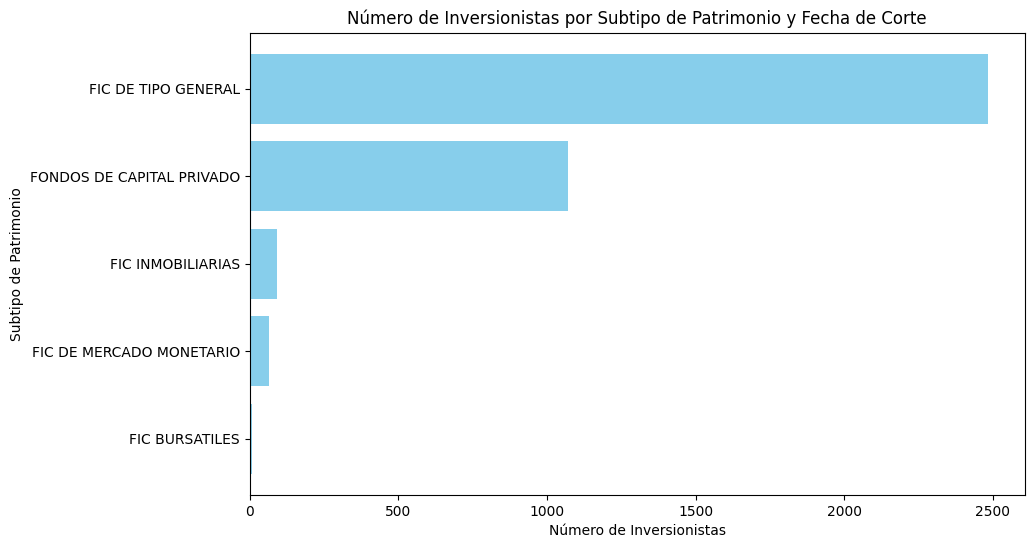

In [ ]:
Inversionistas_sorted = Inversionistas.sort_values(by="NUMERO_INVERSIONISTAS", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(Inversionistas_sorted["NOMBRE_SUBTIPO_PATRIMONIO"], Inversionistas_sorted["NUMERO_INVERSIONISTAS"], color='skyblue')
plt.xlabel("Número de Inversionistas")
plt.ylabel("Subtipo de Patrimonio")
plt.title("Número de Inversionistas por Subtipo de Patrimonio y Fecha de Corte")
plt.gca().invert_yaxis()
plt.show()


A continuación se tomarán todas la variables del conjunto de datos, y se realizara una gráfica de correlación para determinar la forma en que se relacionan o qué tan independientes son una de la otra.

In [ ]:
Base_1.corr()

<ipython-input-21-b864eb974987>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Base_1.corr()


,FECHA_CORTE,TIPO_ENTIDAD,CODIGO_ENTIDAD,TIPO_NEGOCIO,SUBTIPO_NEGOCIO,CODIGO_NEGOCIO,PRINCIPAL_COMPARTIMENTO,TIPO_PARTICIPACION,RENDIMIENTOS_ABONADOS,PRECIERRE_FONDO_DIA_T,NUMERO_UNIDADES_FONDO_CIERRE_OPER_DIA_T_ANTERIOR,VALOR_UNIDAD_OPERACIONES_DIA_T,APORTES_RECIBIDOS,RETIROS_REDENCIONES,VALOR_FONDO_CIERRE_DIA_T,NUMERO_INVERSIONISTAS,RENTABILIDAD_DIARIA,RENTABILIDAD_MENSUAL,RENTABILIDAD_SEMESTRAL,RENTABILIDAD_ANUAL
FECHA_CORTE,1.000000,-0.054690,-0.012648,NaN,0.003606,0.176529,-0.008147,-0.064702,0.004806,0.002876,0.006553,0.017993,0.004418,0.008008,0.002834,-0.002666,0.008114,-0.000602,-0.002890,-0.001273
TIPO_ENTIDAD,-0.054690,1.000000,0.087109,NaN,0.066030,0.270737,0.046264,0.242838,0.002478,-0.006503,-0.014100,-0.000678,-0.007747,-0.001906,-0.006711,-0.038419,0.010602,-0.008017,-0.010700,-0.018268
CODIGO_ENTIDAD,-0.012648,0.087109,1.000000,NaN,0.001142,0.155907,0.001488,0.084008,0.005643,0.010947,-0.002892,-0.033494,-0.027958,-0.030042,0.010868,-0.003692,0.000567,-0.007306,-0.009756,-0.017924
TIPO_NEGOCIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUBTIPO_NEGOCIO,0.003606,0.066030,0.001142,NaN,1.000000,0.314055,0.776478,0.389372,0.002530,-0.006858,0.034265,-0.052546,-0.093298,-0.101573,-0.006914,-0.065093,0.016220,0.019472,0.026005,0.048043
CODIGO_NEGOCIO,0.176529,0.270737,0.155907,NaN,0.314055,1.000000,0.244883,0.087857,-0.002266,-0.165203,0.013912,-0.079214,-0.138460,-0.141610,-0.165309,-0.131298,0.008652,-0.002893,-0.003863,-0.006684
PRINCIPAL_COMPARTIMENTO,-0.008147,0.046264,0.001488,NaN,0.776478,0.244883,1.000000,0.348244,-0.005051,-0.075724,0.043995,-0.025740,-0.072987,-0.078213,-0.075661,-0.049187,0.001530,0.025078,0.033492,0.061514
TIPO_PARTICIPACION,-0.064702,0.242838,0.084008,NaN,0.389372,0.087857,0.348244,1.000000,0.005245,0.085347,0.027063,-0.065568,-0.016226,-0.024937,0.085385,0.047386,-0.003115,0.015395,0.020566,0.038387
RENDIMIENTOS_ABONADOS,0.004806,0.002478,0.005643,NaN,0.002530,-0.002266,-0.005051,0.005245,1.000000,0.058370,-0.000272,-0.000216,0.028307,0.025846,0.058428,0.028918,0.113430,-0.000144,-0.000191,-0.000239
PRECIERRE_FONDO_DIA_T,0.002876,-0.006503,0.010947,NaN,-0.006858,-0.165203,-0.075724,0.085347,0.058370,1.000000,-0.005701,0.002767,0.518784,0.518105,0.999825,0.633852,-0.000448,-0.002757,-0.002858,-0.005812


A simple vista cuesta un poco leer todos los resultados, por lo tanto lo que haremos será graficar todas estas correlaciones en un heatmap o mapa de color.

<ipython-input-55-89133e09ee69>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Base_1.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, annot_kws={"size": 6})


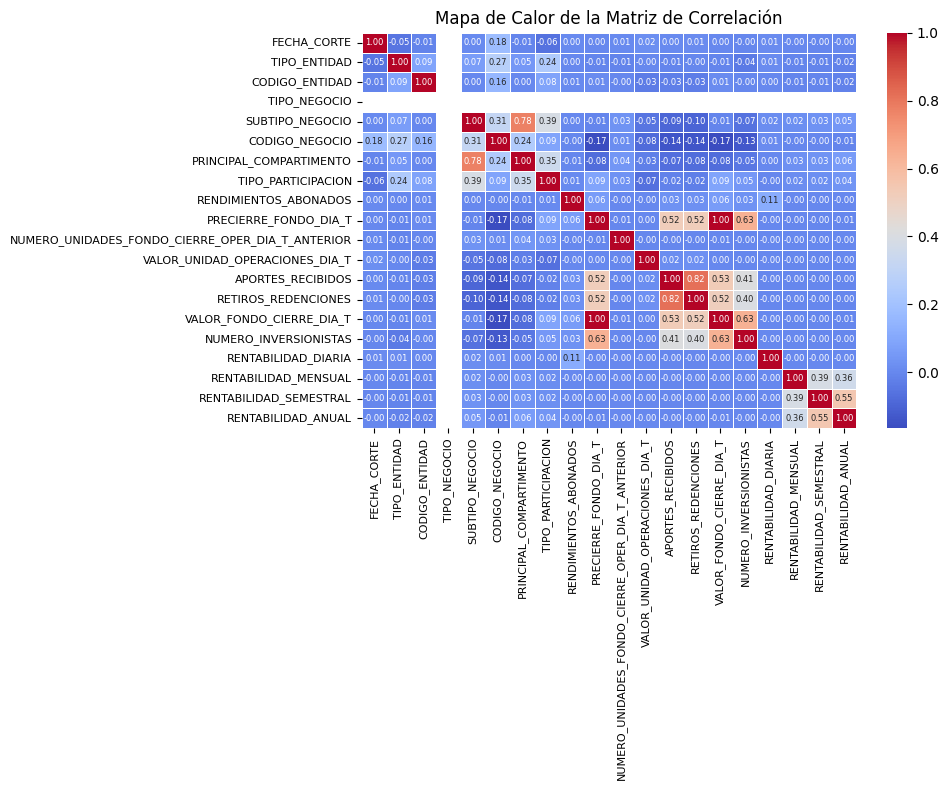

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(Base_1.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, annot_kws={"size": 6})
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.tight_layout()
plt.show()


De acuerdo al anterior mapa de calor, se puede observar cuales de las variables son potencialmente correlacionables para futuros modelos de regresion lineal o multiple.

En este último apartado del proyecto, se visualiza la tendencia anual del valor por unidad de operacion en un dia T.

In [ ]:
Tendencia = Base_1.groupby(["FECHA_CORTE"]).size().reset_index(name='VALOR_UNIDAD_OPERACIONES_DIA_T')
Tendencia

,FECHA_CORTE,VALOR_UNIDAD_OPERACIONES_DIA_T
0,2019,2713
1,2020,2873
2,2021,3131
3,2022,3698
4,2023,2134


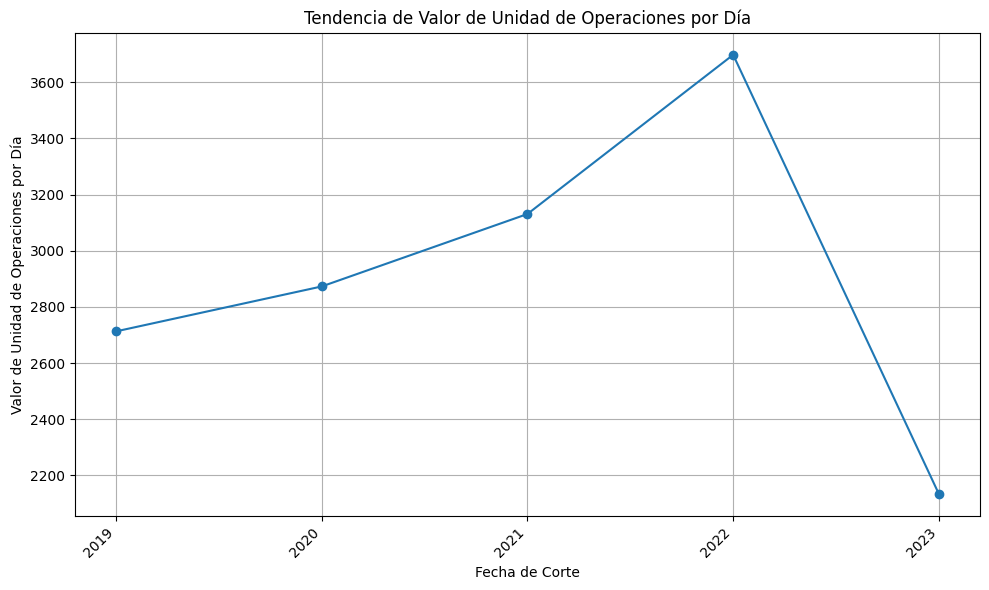

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Tendencia["FECHA_CORTE"], Tendencia["VALOR_UNIDAD_OPERACIONES_DIA_T"], marker='o')
plt.xlabel("Fecha de Corte")
plt.ylabel("Valor de Unidad de Operaciones por Día")
plt.title("Tendencia de Valor de Unidad de Operaciones por Día")
plt.xticks(Tendencia["FECHA_CORTE"].astype(int), rotation=45, ha="right")
plt.grid(True)
plt.tight_layout()
plt.show()


 III. Definir el modelo de datos

Modelo de objetos
 Este modelo es un reflejo del paradigma de la programación orientada a objetos, que se centra en la organización de datos y funcionalidades en unidades llamadas objetos.

IV. • Diseñar la arquitectura y los recursos utilizados

Arquitectura - Python (Google Colaborate)

Python es un "lenguaje de programación ampliamente utilizado en las aplicaciones web, el desarrollo de software, la ciencia de datos y el machine learning (ML). Los desarrolladores utilizan Python porque es eficiente y fácil de aprender, además de que se puede ejecutar en muchas plataformas diferentes. El software Python se puede descargar gratis, se integra bien a todos los tipos de sistemas y aumenta la velocidad del desarrollo."(Amazon, s.f).



Recursos - Archivo CSV (Descargado de la pagina web)

Un archivo CSV (valores separados por comas) es un tipo especial de archivo que puede crear o editar en Excel. En lugar de almacenar la información en columnas, los archivos CSV almacenan datos separados por comas.(Microsoft, s.f).



V. Indique claramente los motivos de la elección de las herramientas y tecnologías para el proyecto.

Como fuente de información elegí un archivo de extensión CSV, siendo que permite manejar con facilidad el volumen de data y en aspectos de carga, el codigo de python posee una función especifica para ella, lo cual dinamiza el proceso de traslado.
Y, en segundo lugar, google colab ofrece un ambiente online el cual permite cargar data de diversas maneras; esto representa un oportunidad de trabajo sin ocupar o "llenar" el disco local del equipo donde se este trabajando el proyecto. Es una herramienta completa, siendo qye tambien guarda una copia del codigo y permite su edicion desde cualquier computador con cuenta gmail; y finalmente, porque tiene gran capacidad de adaptacion para archivos de alto volumen de data.
Para finalizar, el lenguaje python ofrece la oportunidad para el aprendiz o experto de tener un codigo intuitivo y facil de entender dada la estructura y comando que maneja.

VI. Proponga con qué frecuencia deben actualizarse los datos y por qué.

La frecuencia con la cual deberia actualizarce la información es semanal, ya que la página fuente esta constantemente cargando información la cual resultaria útil para los usuarios o analistas que la abstraigan de insumo para sus informes u otros. Asi mismo, permite dar conceptos de tendencias y establecer un histórico de dicha información.

VII. Completa la redacción del proyecto

¿Cuál es el objetivo del proyecto?

Explotar, organizar y aprovechar de la manera más eficiente los datos para obtener información valiosa, mejorar la toma de decisiones y lograr diversos objetivos en áreas como los negocios, la investigación y/o los intereses que posea la organización.


• ¿Qué preguntas quieres hacer?

-¿Cuántos negocios de FIC de mercado monetario se presentaron en el año 2019?

-¿Cuántos negocios por nombre subtipo patrimonio se generaron durante cada año, para cada una de las entidades?

-¿Qué porcentaje de participacion en el sistema financiero ocupa cada uno de los tipos de patrimonio?



• ¿Por qué eligió el modelo que eligió?

Un modelo de objetos en este contexto se refiere a la utilización de estructuras de datos y objetos específicos para representar y manipular los datos.

Referencias bibliograficas


1. Amazon.(sin fecha). Pagina web: https://aws.amazon.com/es/what-is/python/
2. Datos abiertos. Pagina web:https://www.datos.gov.co/Hacienda-y-Cr-dito-P-blico/Rentabilidades-de-los-Fondos-de-Inversi-n-Colectiv/qhpu-8ixx
3. Microsoft. (sin fecha). Pgina web: https://support.microsoft.com/es-es/office/crear-o-editar-archivos-csv-para-importarlos-a-outlook-4518d70d-8fe9-46ad-94fa-1494247193c7